# LOADING DATA

Data was scraped from BBC Food using Scrapy. The code can be found in the GitHub repo. 

In [72]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
raw = pd.read_csv('datasets/BBC_recipe_data.csv')
raw.head()

,cook_time,cuisine,ingredients,ingredients_full,name,prep_time,rating,rating_count,servings
0,30 mins to 1 hour,African,"peppers,sweet potatoes,red onions,cherry tomat...","2 large red or orange peppers, de-seeded and c...",Moroccan-style roasted veg,less than 30 mins,3.888889,9,Serves 2
1,10 to 30 mins,African,"basmati rice,vegetable oil,chicken thighs,onio...","300g/10½oz basmati rice,1 tbsp vegetable oil,8...",Jollof rice with chicken,less than 30 mins,3.470588,17,Serves 4
2,30 mins to 1 hour,African,"ground ginger,garlic,chilli,thyme,cinnamon,nut...","30g/1oz ground ginger ,30g/1oz garlic granules...",Jollof Quorn pilau with salted cucumber,less than 30 mins,3.200000,5,Serves 4
3,30 mins to 1 hour,Irish,"mashed potato,potatoes,plain flour,milk,butter...","250g/9oz colcannon or mashed potato,250g/9oz p...",Boxty with mackerel,less than 30 mins,5.000000,1,Serves 4
4,30 mins to 1 hour,Indian,"vegetable oil,onion,sea salt,garlic,cumin,cori...","1 tbsp vegetable oil,1 large onion, thinly sli...",Mixed vegetable and almond biryani,less than 30 mins,2.223214,112,Serves 4


In [74]:
raw.shape

(1773, 9)

In [75]:
raw.isna().sum()

cook_time           0
cuisine             0
ingredients         0
ingredients_full    0
name                0
prep_time           0
rating              0
rating_count        0
servings            6
dtype: int64

In [76]:
raw[raw['servings'].isna()]

,cook_time,cuisine,ingredients,ingredients_full,name,prep_time,rating,rating_count,servings
138,1 to 2 hours,North African,"vegetable oil,lamb chops,onion,saffron,ground ...","2 tbsp vegetable oil ,500g/1lb 2oz lamb chops,...",Harira soup,less than 30 mins,2.333333,3,NaN
595,30 mins to 1 hour,French,"olive oil,globe artichoke,monkfish,pancetta,sh...","5 tbsp olive oil,1 fresh globe artichoke, hear...",Monkfish Bourguignon,less than 30 mins,5.000000,1,NaN
770,30 mins to 1 hour,British,"plain flour,eggs,wholegrain mustard,milk,beef ...","225g/8oz plain flour,8 free-range eggs,1 tbsp ...",Classic toad in the hole,overnight,5.000000,3,NaN
1051,over 2 hours,Japanese,"soy sauce,mirin,teriyaki sauce,sugar,pork bell...","175ml/6fl oz dark soy sauce,120ml/4fl oz sake,...",Chashu (Japanese braised pork),less than 30 mins,5.000000,1,NaN
1187,30 mins to 1 hour,Indian,"cumin,coriander seeds,fennel seeds,fenugreek,v...","1 tsp cumin seeds,1 tsp coriander seeds,1 tsp ...",Prawn dopiaza,less than 30 mins,5.000000,3,NaN
1253,10 to 30 mins,Indian,"yoghurt,rice vinegar,ginger,garlic,chilli powd...","150g/5½oz Greek yoghurt,2 tbsp rice vinegar,3c...",Indian fried chicken,over 2 hours,5.000000,3,NaN


In [77]:
for column in raw.columns:
    print("---- %s ---" % column)
    print(raw[column].value_counts())

---- cook_time ---
10 to 30 mins          643
30 mins to 1 hour      492
1 to 2 hours           269
over 2 hours           255
less than 10 mins      107
no cooking required      7
Name: cook_time, dtype: int64
---- cuisine ---
Italian                       357
British                       354
Indian                        224
Thai and South-East Asian     123
French                        116
Chinese                       110
American                       86
Mexican                        65
North African                  49
Turkish and Middle Eastern     45
Caribbean                      38
Spanish                        38
Greek                          32
East European                  31
Japanese                       28
African                        17
Pakistani                      15
Nordic                         13
Korean                         10
Irish                           9
Portuguese                      7
South American                  6
Name: cuisine, dtype: in

# DATA CLEANING

### Cleaning serving size to a number

In [78]:
raw.servings.value_counts()

Serves 4                        861
Serves 2                        224
Serves 6                        192
Serves 4-6                      112
Serves 6-8                       49
                               ... 
Makes 6-8                         1
Makes 8 mini pizzas               1
Serves 2–4                        1
Serves 6 as an accompaniment      1
Makes 20 portions                 1
Name: servings, Length: 86, dtype: int64

In [79]:
servings = raw.servings

servings_c = servings.str.replace(r'[A-Za-z ]', '')
raw.servings = servings_c

# CUISINE COUNTS

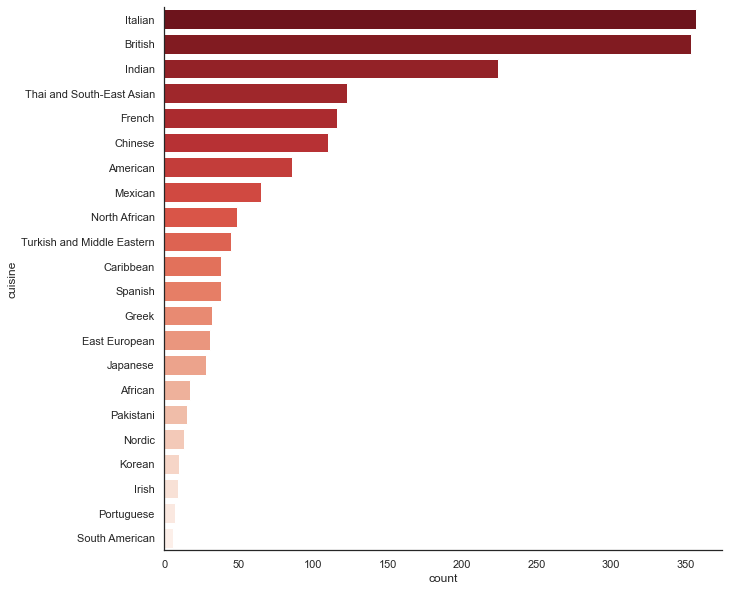

In [80]:
cuisines_n = raw.cuisine.value_counts()

#set up plot
size = (10,10)
fig, ax = plt.subplots(1, 1, figsize = size)

sns.set_theme(style = "white")
ax = sns.countplot(y = 'cuisine', data = raw, palette="Reds_r", order = raw['cuisine'].value_counts().index) #set order
sns.despine()


In [81]:
#relative frequencies of cuisines

raw['cuisine'].value_counts(normalize=True) * 100

Italian                       20.135364
British                       19.966159
Indian                        12.633954
Thai and South-East Asian      6.937394
French                         6.542583
Chinese                        6.204174
American                       4.850536
Mexican                        3.666103
North African                  2.763677
Turkish and Middle Eastern     2.538071
Caribbean                      2.143260
Spanish                        2.143260
Greek                          1.804851
East European                  1.748449
Japanese                       1.579244
African                        0.958827
Pakistani                      0.846024
Nordic                         0.733221
Korean                         0.564016
Irish                          0.507614
Portuguese                     0.394811
South American                 0.338409
Name: cuisine, dtype: float64

In [82]:
# create table of average ratings (nanmean) and number of ratings for each cuisine
ratings = raw.groupby('cuisine').agg({'rating': [np.nanmean],
                           'rating_count': [np.nansum]})

ratings.columns = ratings.columns.droplevel()
ratings.reset_index(inplace = True)
ratings.columns = ['Cuisine', 'Average Rating', 'Number of ratings']
ratings

,Cuisine,Average Rating,Number of ratings
0,African,4.454479,80
1,American,4.648867,908
2,British,4.459277,3629
3,Caribbean,4.578989,188
4,Chinese,4.561886,1008
5,East European,4.720223,267
6,French,4.563308,791
7,Greek,4.508476,536
8,Indian,4.434341,2840
9,Irish,4.437608,56


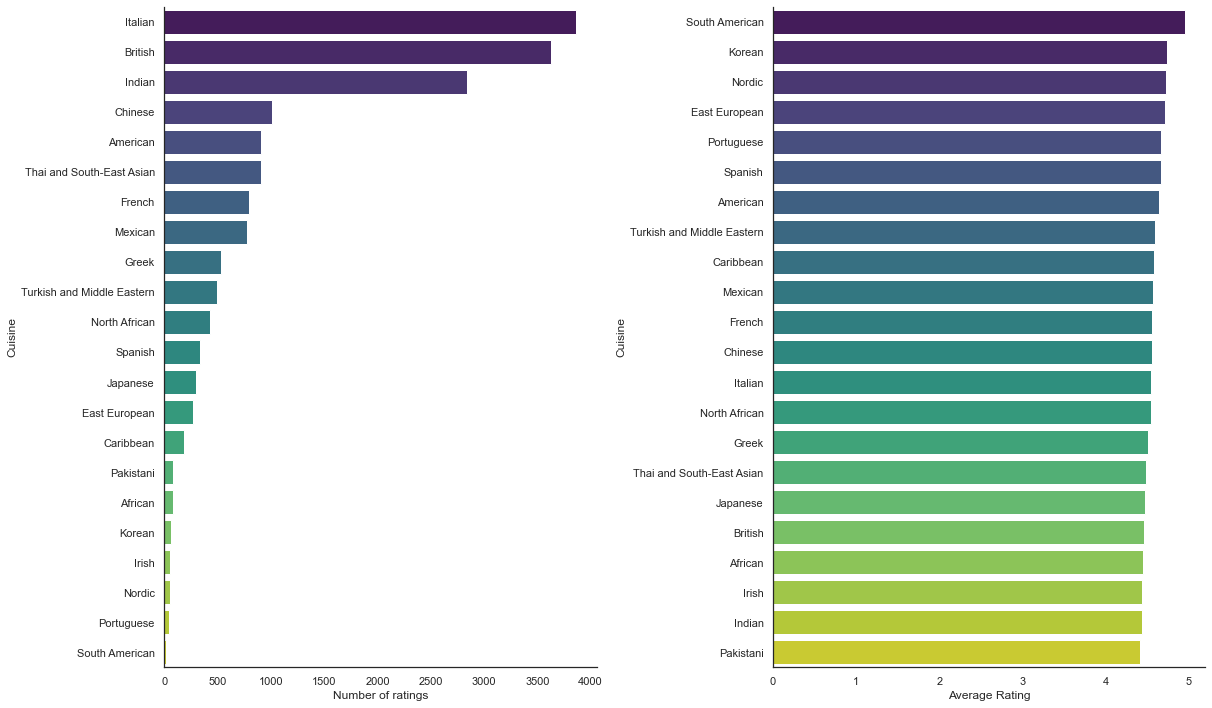

In [83]:
size = (17,10)
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = size)

#plot number of ratings 
axs[0] = sns.barplot(y= 'Cuisine', x = 'Number of ratings', data = ratings, 
            order = ratings.sort_values('Number of ratings', ascending = False)['Cuisine'],
            palette = 'viridis',
            ax = axs[0])

#plot average ratings per cuisine
axs[1] = sns.barplot(y= 'Cuisine', x = 'Average Rating', data = ratings, 
            order = ratings.sort_values('Average Rating', ascending = False)['Cuisine'],
            palette = 'viridis',
            ax = axs[1])
sns.despine()
plt.tight_layout()

In [84]:
# does the average number of ratings and ratings correlate?
ratings.corr()

,Average Rating,Number of ratings
Average Rating,1.000000,-0.341062
Number of ratings,-0.341062,1.000000


It looks like the more ratings a cuisine has, the lower rating it has (0.3 corr). That is expected due to regression to the mean and higher chances of extremities at lower sample size.

Interestingly, prep time and cook time do not correlate at all.

In [85]:
raw[['prep_time', 'cook_time']].apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

,prep_time,cook_time
prep_time,1.000000,-0.012224
cook_time,-0.012224,1.000000


## DROP LESS FREQUENT CUISINES

In [86]:
df1 = raw[['cuisine', 'cook_time', 'prep_time']]
cook_t = pd.pivot_table(df1, columns = ['cuisine'], index = ['cook_time'], aggfunc = 'count').T

In [87]:
cuisines_above_threshold = raw.cuisine.value_counts()[raw.cuisine.value_counts() > 40].index

In [88]:
cuisines_above_threshold

Index(['Italian', 'British', 'Indian', 'Thai and South-East Asian', 'French',
       'Chinese', 'American', 'Mexican', 'North African',
       'Turkish and Middle Eastern'],
      dtype='object')

In [89]:
raw = raw[raw['cuisine'].isin(cuisines_above_threshold)]

In [90]:
df1 = raw[['cuisine', 'cook_time']]
cook_t = pd.pivot(df1, columns = ['cuisine'], values=  ['cook_time'])
cook_t

cook_time                                                              \
cuisine  American       British Chinese             French             Indian   
4             NaN           NaN     NaN                NaN  30 mins to 1 hour   
5             NaN           NaN     NaN                NaN       1 to 2 hours   
10            NaN           NaN     NaN  30 mins to 1 hour                NaN   
16            NaN  1 to 2 hours     NaN                NaN                NaN   
17            NaN           NaN     NaN                NaN                NaN   
...           ...           ...     ...                ...                ...   
1657          NaN           NaN     NaN                NaN  30 mins to 1 hour   
1658          NaN           NaN     NaN                NaN  30 mins to 1 hour   
1659          NaN           NaN     NaN                NaN       1 to 2 hours   
1660          NaN           NaN     NaN                NaN                NaN   
1664          NaN           NaN     NaN                NaN                NaN   

                                                                               \
cuisine        Italian        Mexican North African Thai and South-East Asian   
4                  NaN            NaN           NaN                       NaN   
5                  NaN            NaN           NaN                       NaN   
10                 NaN            NaN           NaN                       NaN   
16                 NaN            NaN           NaN                       NaN   
17                 NaN  10 to 30 mins           NaN                       NaN   
...                ...            ...           ...                       ...   
1657               NaN            NaN           NaN                       NaN   
1658               NaN            NaN           NaN                       NaN   
1659               NaN            NaN           NaN                       NaN   
1660     10 to 30 mins            NaN           NaN                       NaN   
1664     10 to 30 mins            NaN           NaN                       NaN   

                                    
cuisine Turkish and Middle Eastern  
4                              NaN  
5                              NaN  
10                             NaN  
16                             NaN  
17                             NaN  
...                            ...  
1657                           NaN  
1658                           NaN  
1659                           NaN  
1660                           NaN  
1664                           NaN  

[1529 rows x 10 columns]

In [91]:
df1 = raw[['cuisine', 'cook_time', 'prep_time']]
cook_t = pd.pivot_table(df1, index = ['cuisine'], columns = ['cook_time'], aggfunc = 'count')
cook_t

prep_time                                  \
cook_time                  1 to 2 hours 10 to 30 mins 30 mins to 1 hour   
cuisine                                                                   
American                           11.0          22.0              27.0   
British                            95.0          54.0              97.0   
Chinese                             5.0          53.0              13.0   
French                             19.0          35.0              34.0   
Indian                             29.0          89.0              85.0   
Italian                            45.0         172.0              84.0   
Mexican                             8.0          27.0              19.0   
North African                      13.0          10.0              12.0   
Thai and South-East Asian           3.0          80.0              15.0   
Turkish and Middle Eastern          8.0          18.0              12.0   

                                                                               
cook_time                  less than 10 mins no cooking required over 2 hours  
cuisine                                                                        
American                                 5.0                 2.0         19.0  
British                                  5.0                 NaN        103.0  
Chinese                                 33.0                 NaN          6.0  
French                                   4.0                 NaN         24.0  
Indian                                   6.0                 NaN         15.0  
Italian                                 26.0                 3.0         27.0  
Mexican                                  2.0                 1.0          8.0  
North African                            2.0                 NaN         12.0  
Thai and South-East Asian               13.0                 NaN         12.0  
Turkish and Middle Eastern               2.0                 NaN          5.0

In [92]:
df1 = raw[['cuisine', 'cook_time', 'prep_time']]
cook_t = pd.pivot_table(df1, index = ['cuisine'], columns = ['prep_time'], aggfunc = 'count')
cook_t

cook_time                                      \
prep_time                  1-2 hours 30 mins to 1 hour less than 30 mins   
cuisine                                                                    
American                         3.0               6.0              60.0   
British                         22.0              51.0             253.0   
Chinese                          4.0               8.0              90.0   
French                           3.0              14.0              87.0   
Indian                          15.0              30.0             150.0   
Italian                         18.0              40.0             281.0   
Mexican                          2.0               2.0              57.0   
North African                    2.0               2.0              41.0   
Thai and South-East Asian        5.0               7.0              98.0   
Turkish and Middle Eastern       1.0               8.0              26.0   

                                                   
prep_time                  over 2 hours overnight  
cuisine                                            
American                            5.0      12.0  
British                            11.0      17.0  
Chinese                             2.0       6.0  
French                              5.0       7.0  
Indian                             11.0      18.0  
Italian                             7.0      11.0  
Mexican                             3.0       1.0  
North African                       NaN       4.0  
Thai and South-East Asian           8.0       5.0  
Turkish and Middle Eastern          5.0       5.0

# WORDS

In [129]:
ingredients.loc[:, ingredients.columns != 'cuisine']

,0
0,"[vegetable oil, onion, sea salt, garlic, cumin..."
1,"[curry leaves, onions, rapeseed oil, yoghurt, ..."
2,"[buckwheat flour, egg, butter, ghee, olive oil..."
3,"[turkey, bacon, butter, leeks, white bread, dr..."
4,"[cumin, coriander, cayenne pepper, thyme, chil..."
...,...
1524,"[chicken thighs, sunflower oil, cumin, mustard..."
1525,"[lamb shoulder, coriander, mint, ginger, garli..."
1526,"[chana dal, onions, garlic, ginger, vegetable ..."
1527,"[pasta, roast chicken, plain flour, butter, ch..."


In [132]:

from sklearn.preprocessing import MultiLabelBinarizer

#create instance
mlb = MultiLabelBinarizer()

#create a Bag of Words (each word has its own column and is binary - 0 or 1)

#split ingredients by ','
ingredients = raw['ingredients'].str.split(',')

#convert all ingredients to lowercase
ingredients = pd.Series([[x.lower() for x in sublst] for sublst in ingredients])

#create a dataframe of binarized ingredient columns
ing_list = pd.DataFrame(mlb.fit_transform(ingredients), 
                        columns = mlb.classes_, index = ingredients.index)

In [135]:
ingredients = pd.DataFrame(ingredients)
cuisines = raw['cuisine'].reset_index().drop(columns = ['index'])
ing_list['cuisine'] = cuisines


In [137]:
# create new dataframe
df = raw.copy()

# drop useless column = name
df.drop(columns = ['ingredients_full', 'name'], inplace = True)
df.head()

,cook_time,cuisine,ingredients,prep_time,rating,rating_count,servings
4,30 mins to 1 hour,Indian,"vegetable oil,onion,sea salt,garlic,cumin,cori...",less than 30 mins,2.223214,112,4
5,1 to 2 hours,Indian,"curry leaves,onions,rapeseed oil,yoghurt,tomat...",30 mins to 1 hour,4.000000,1,6
10,30 mins to 1 hour,French,"buckwheat flour,egg,butter,ghee,olive oil,blac...",1-2 hours,5.000000,1,4
16,1 to 2 hours,British,"turkey,bacon,butter,leeks,white bread,dried fr...",30 mins to 1 hour,4.750000,4,6-8
17,10 to 30 mins,Mexican,"cumin,coriander,cayenne pepper,thyme,chillies,...",less than 30 mins,5.000000,8,4


In [138]:
ing_list

,'nduja,00 flour,acidulated water,ajwain,ale,aleppo pepper,allspice,almond,almond milk,almonds,...,wild rice,wine,wood pigeon,worcestershire sauce,wraps,yeast,yeast extract,yoghurt,zest,cuisine
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Indian
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,Indian
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,French
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,British
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,Mexican
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1524,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Indian
1525,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,Indian
1526,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Indian
1527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Italian


In [139]:
# create relative frequencies of cuisines
frequencies_cuisines = pd.DataFrame(raw['cuisine'].value_counts(normalize=True) * 100)

# name column
frequencies_cuisines.columns = ['relative_count']

# create column of absolute frequencies
frequencies_cuisines['absolute_count'] = raw['cuisine'].value_counts()

# view
frequencies_cuisines

,relative_count,absolute_count
Italian,23.348594,357
British,23.152387,354
Indian,14.650098,224
Thai and South-East Asian,8.044474,123
French,7.586658,116
Chinese,7.194245,110
American,5.624591,86
Mexican,4.251145,65
North African,3.204709,49
Turkish and Middle Eastern,2.943100,45


In [140]:
# sum counts of each ingredient per cuisine (first group by cuisine, then apply sum per COLUMN, and then drop useless col.)
df = ing_list.groupby('cuisine').apply(sum, 0).drop(columns = ['cuisine'])

# merge all binarized ingredients with frequencies
df = df.merge(frequencies_cuisines, how = 'inner', right_index = True, left_index = True)

# view that it worked!
df.head()

,'nduja,00 flour,acidulated water,ajwain,ale,aleppo pepper,allspice,almond,almond milk,almonds,...,wine,wood pigeon,worcestershire sauce,wraps,yeast,yeast extract,yoghurt,zest,relative_count,absolute_count
American,0,0,1,0,0,0,3,0,0,0,...,0,0,19,0,4,1,4,0,5.624591,86
British,0,0,0,0,17,0,6,1,1,0,...,1,1,39,0,2,9,3,1,23.152387,354
Chinese,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,2,0,1,1,7.194245,110
French,0,0,0,0,0,0,0,0,0,2,...,2,0,2,0,0,0,0,0,7.586658,116
Indian,0,0,0,7,1,0,3,0,0,4,...,0,0,0,0,1,0,71,1,14.650098,224


In [141]:
len(df.index)

10

In [142]:
df.loc['Indian'].sort_values()

'nduja              0.0
lettuces            0.0
taco seasoning      0.0
tabasco             0.0
lime pickle         0.0
                  ...  
turmeric          137.0
cumin             146.0
ginger            157.0
garlic            176.0
absolute_count    224.0
Name: Indian, Length: 806, dtype: float64

## Adding plurals together

In [143]:
import nltk
nltk.edit_distance("onions", "onion")

1

In [144]:
ings = list(df.columns)

type(ings)

list

In [145]:
import itertools

# get all possible combinations
ings_combinations = list(itertools.combinations(ings, 2))

In [146]:
#get all Levenshtein distances into once dict

distances = {}
for index, pair in enumerate(ings_combinations):
    distances[pair] = nltk.edit_distance(pair[0], pair[1])
    if index % 10000 == 0:
        print(index)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000


In [147]:
#sort dictionary

distances_s = sorted(distances.items(), key=lambda x: x[1])

In [148]:
# get pairs with distance 1 (one letter difference, i.e. "s"/plural)

pairs = []
for entry in distances_s:
    if entry[1] == 1:
        pairs.append(entry[0])

In [149]:
# print all pairs
for index, pair in enumerate(pairs):
    print(index, pair)

0 ('ale', 'kale')
1 ('almond', 'almonds')
2 ('apple', 'apples')
3 ('artichoke', 'artichokes')
4 ('aubergine', 'aubergines')
5 ('avocado', 'avocados')
6 ('baguette', 'baguettes')
7 ('beef', 'beer')
8 ('beetroot', 'beetroots')
9 ('black bean', 'black beans')
10 ('braising steak', 'braising steaks')
11 ('bramley apple', 'bramley apples')
12 ('cardamom', 'cardamoms')
13 ('carrot', 'carrots')
14 ('cashew', 'cashews')
15 ('cherry', 'sherry')
16 ('chicken', 'chickens')
17 ('chicken breast', 'chicken breasts')
18 ('chicken liver', 'chicken livers')
19 ('chicken thigh', 'chicken thighs')
20 ('chickpea', 'chickpeas')
21 ('chipotle', 'chipotles')
22 ('courgette', 'courgettes')
23 ('cucumber', 'cucumbers')
24 ('egg', 'eggs')
25 ('egg white', 'egg whites')
26 ('egg yolk', 'egg yolks')
27 ('flour tortilla', 'flour tortillas')
28 ('gherkin', 'gherkins')
29 ('grapeseed oil', 'rapeseed oil')
30 ('ham', 'jam')
31 ('jerusalem artichoke', 'jerusalem artichokes')
32 ('king edward', 'king edwards')
33 ('lee

In [150]:
#manually remove incorrectly labeles plurals
not_plural_indexes = [1, 7, 15, 29, 30, 48, 49, 56, 58, 63]

pairs = [i for j, i in enumerate(pairs) if j not in not_plural_indexes]

In [151]:
# for each pair, add the columns, remove old ones and create final one (singular)

df_checkpoint = df.copy()

for pair in pairs:
    new_col = df_checkpoint[pair[0]].add(df_checkpoint[pair[1]])
    df_checkpoint.drop(columns = [str(pair[0]), str(pair[1])], inplace = True)
    df_checkpoint[str(pair[0])] = new_col

In [152]:
def add_cols(cols_to_drop, new_name):
    new_col = df[cols_to_drop[0]].add(df[cols_to_drop[1]])
    df.drop(columns = cols_to_drop, inplace = True)
    df[new_name] = new_col

In [153]:
add_cols(['chicken', 'chicken thigh'], 'chicken')
add_cols(['chicken', 'chicken breast'], 'chicken')
add_cols(['lettuce', 'little gem lettuce'], 'lettuce')
add_cols(['egg', 'egg white'], 'egg')
add_cols(['tomatoes', 'chopped tomatoes'], 'tomatoes')
add_cols(['tomato', 'tomatoes'], 'tomatoes')

In [154]:
add_cols(['egg', 'egg yolk'], 'egg')

In [158]:
add_cols(['onion', 'red onion'], 'onion')

In [157]:
add_cols(['vegetable oil', 'sunflower oil'], 'vegetable oil')

In [155]:
# manually remove a "triple" ingredient 

df = df_checkpoint.copy()
new_col = df['chilli'].add(df['chillies'])
df.drop(columns = ['chilli', 'chillies'], inplace = True)
df['chilli'] = new_col

# drop "useless" columns

df.drop(columns = ['sea salt', 'salt', 'oil'], inplace = True)

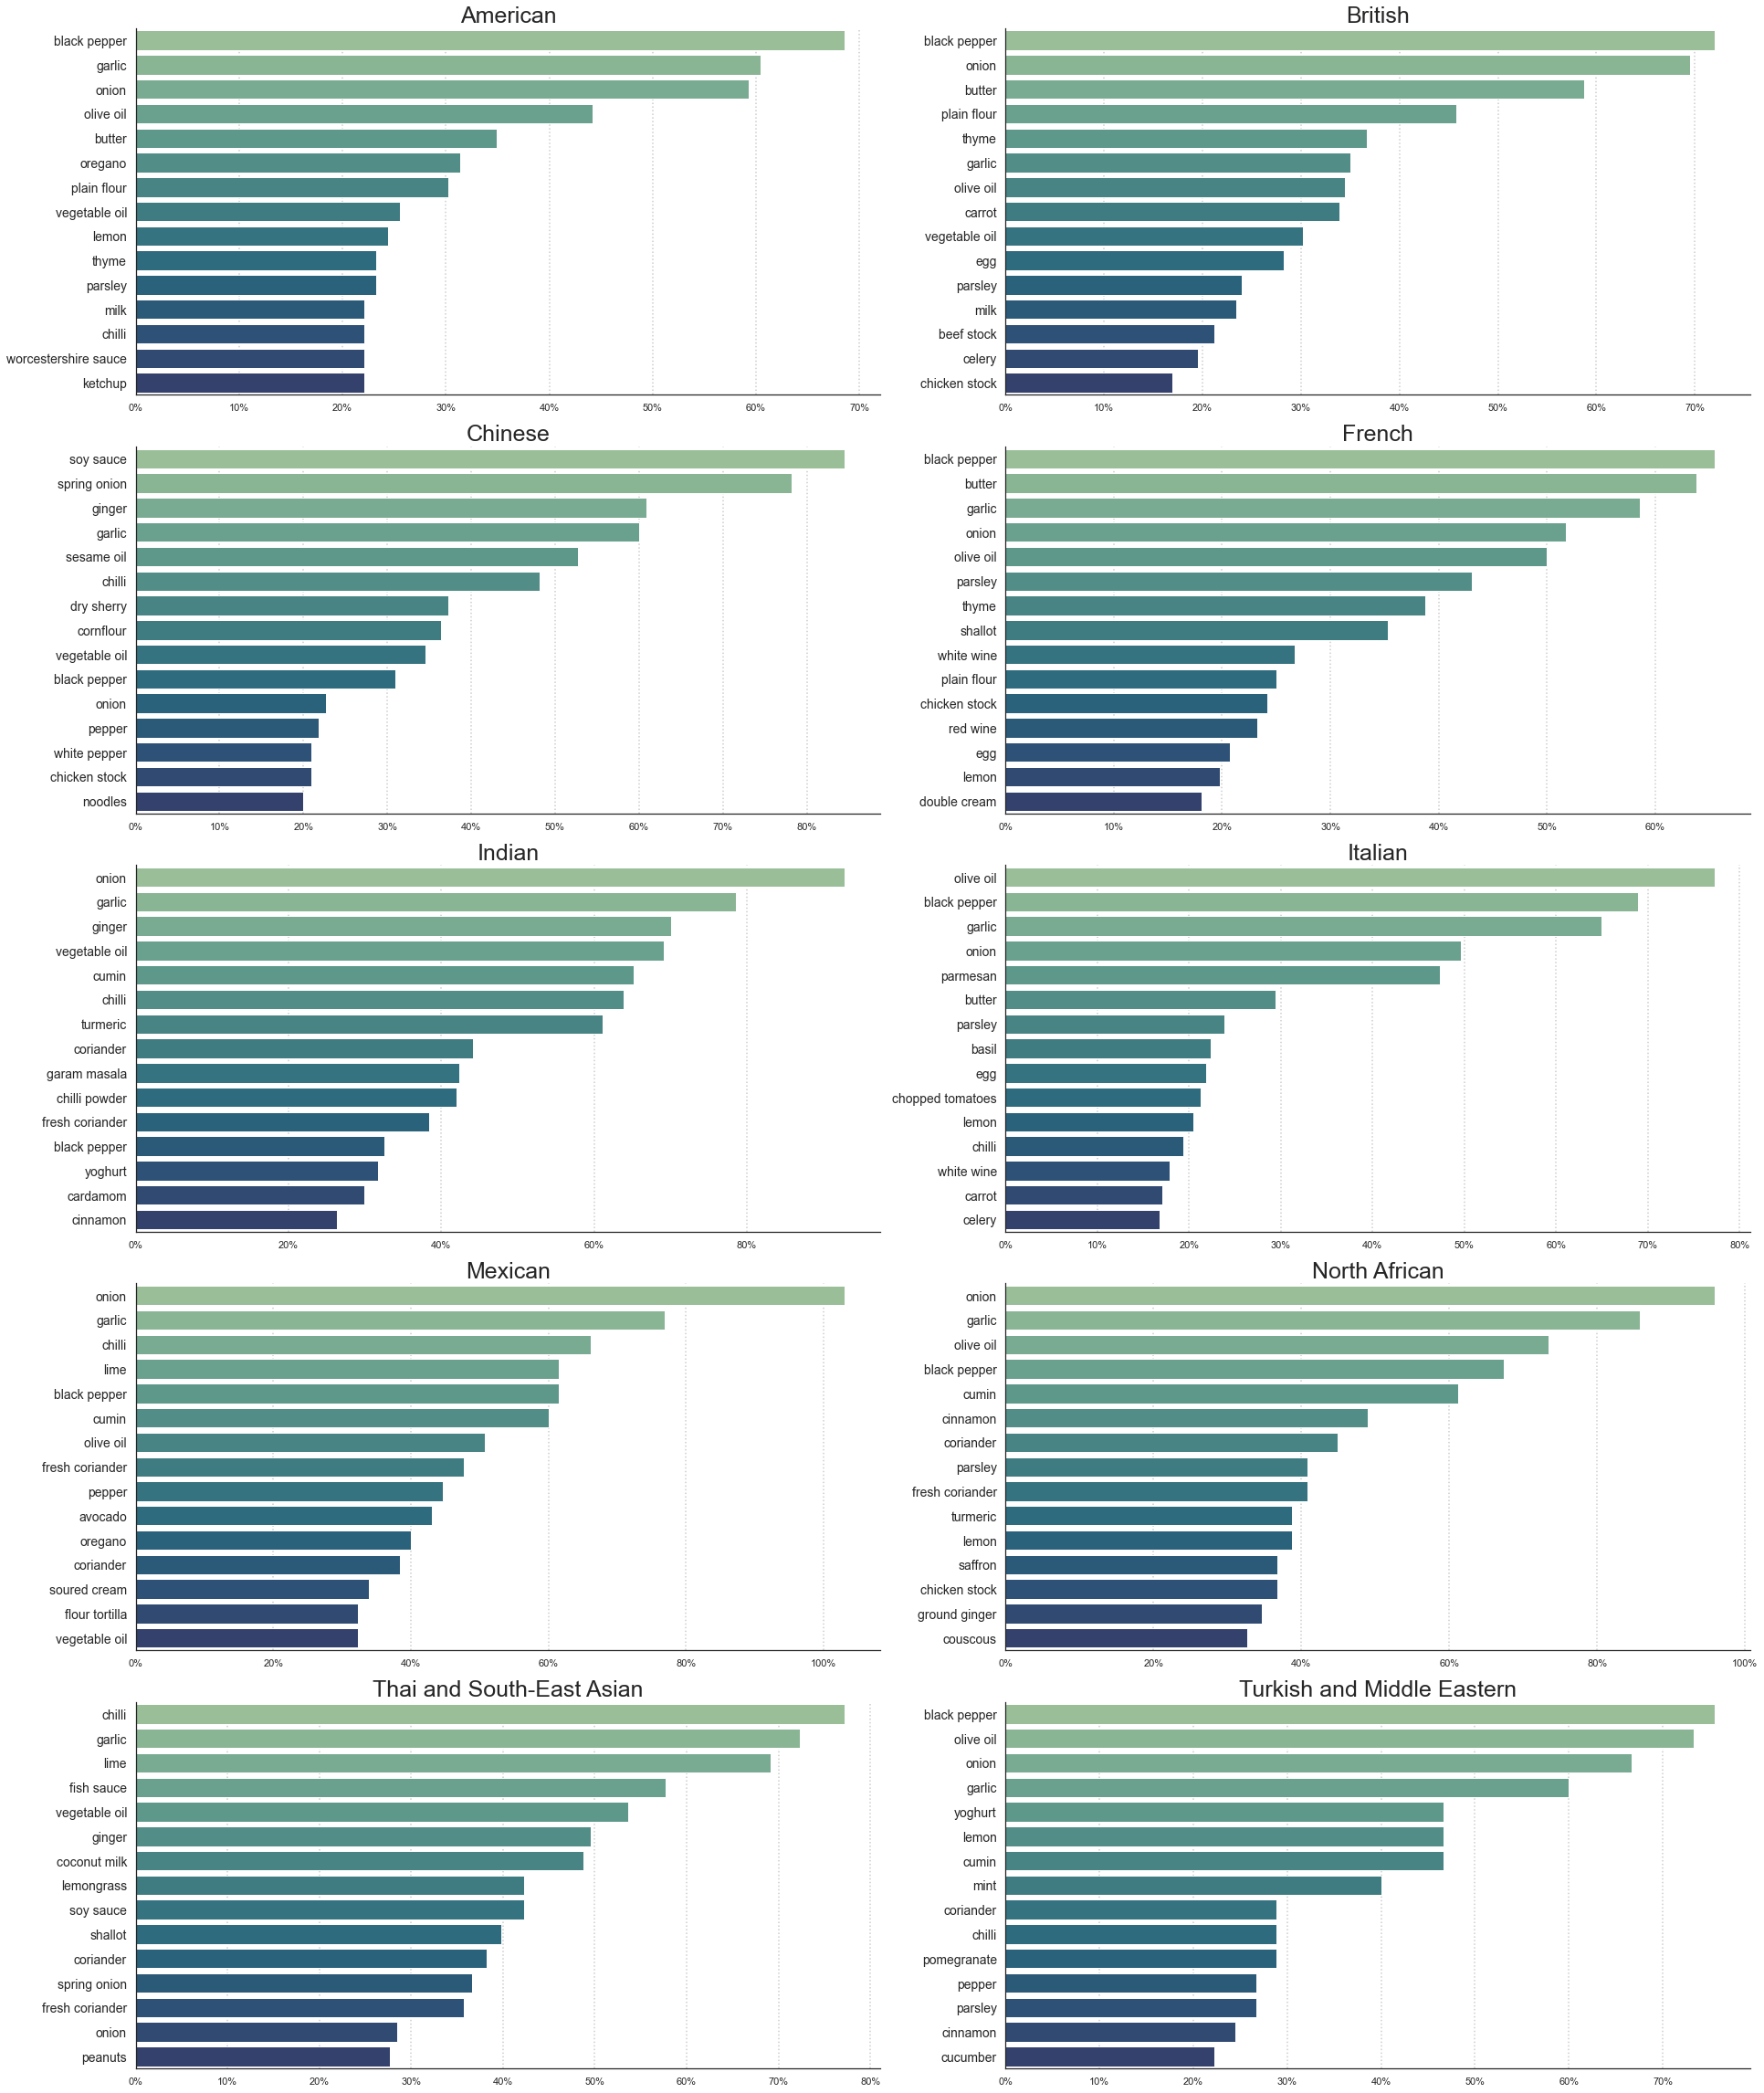

In [159]:
from matplotlib.ticker import FuncFormatter

# instantiate dictionary (empty)
ingredients_dict = {}

# set figure size
figsize = (27,32)

# instantiate subplots - 3x5 grid (10 cuisines)
fig, axs = plt.subplots(ncols = 2, nrows = int(len(df.index)/2), figsize = figsize)
axs = axs.flatten()

# for loop enumerated index (index = name of cuisine, enumerate assigns number to each)
for numb, cuisine in enumerate(df.index):
    
    # drop two last columns (absolute and relative frequencies)
    df_plot = df.drop(columns = ['absolute_count', 'relative_count'])
    
    # sort ingredient frequencies and use only top 20 most used
    ings = df_plot.loc[cuisine].sort_values(ascending = False)[:15]
    
    # add to dictionary - key is cuisine, value is list of frequencies of ingredients
    ingredients_dict[cuisine] = ings
    
    # convert to relative from absolute - divide each frequency by total number of recipes from each cuisine
    ing_freq = [ingredient/len(raw[raw['cuisine'] == cuisine]) for ingredient in ingredients_dict[cuisine]]
    
    # add plot to an axis
    axs[numb] = sns.barplot(y = ingredients_dict[cuisine].index, # names of ingredients as index
                            x = ing_freq, # x as frequencies
                            ax = axs[numb], # put to wanted ax (row)
                            palette = "crest") # color
    axs[numb].set_title(cuisine, fontsize = 25) # set title as cuisine
    sns.despine() 
    axs[numb].grid(axis = 'x', linestyle = ':', linewidth = 1.5) # add grid
    axs[numb].xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x))) # convert x axis ticks format to %
    plt.tight_layout()
    
    # set font size larger to be more readable
    axs[numb].set_yticklabels(labels = ingredients_dict[cuisine].index, size = 14)
    
plt.savefig('cuisine_plots.jpg')